In [1]:
import os 
import numpy as np
import pandas as pd

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.style as style
from IPython.core.pylabtools import figsize

style.available
style.use('ggplot')

import json

In [2]:
def save_fig(fig_id,IMAGES_PATH, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def Date2Int(x):
    Date = datetime.strptime(x,"%Y-%m-%d %H:%M:%S")
    return(10000*Date.year + 100*Date.month + Date.day)

In [3]:
def DataReader(NAME = "FigData",CateList = [],PATH = "",Type = "TXT"):
    if not CateList:
        CateList = ["Clothing_Shoes_and_Jewelry_5","Electronics_5"
                ,"Tools_and_Home_Improvement_5","Cell_Phones_and_Accessories_5"
                ,"Automotive_5","Sports_and_Outdoors_5"]
    FigData = {}
    for Cate in CateList:
        #ipdb.set_trace()
        FigData[Cate] = {}
        if not PATH: ReaderPATH = os.path.join("",Cate)
        else: ReaderPATH =  os.path.join(PATH,Cate)
        FileList = os.listdir(ReaderPATH)
        for File in FileList:
            if File[:len(NAME)] == NAME:
                if Type == "TXT":
                    with open(os.path.join(ReaderPATH,File),"r") as file:
                        data = file.read()
                    FigData[Cate].update(eval(data))
                if Type == "CSV":
                    data = pd.read_csv(os.path.join(ReaderPATH,File))
                    FigData[Cate].update(data)
                
    return FigData


def SummaryFigDrawer(Yvar,Xvar = "absSScoreAll",Type = "LABEL",FigData = {}
                     ,xvlineloc = [],ColorList = []
                     ,CateList = [],SaveFlag = True,PATH = ""):
    
    if not ColorList: 
        ColorList = ['#2CBDFE','#47DBCD'
                     ,'#F3A0F2','#9D2EC5'
                     ,'#661D98','#F5B14C']
    if not CateList:
        CateList = ["Clothing_Shoes_and_Jewelry_5","Electronics_5"
                ,"Tools_and_Home_Improvement_5","Cell_Phones_and_Accessories_5"
                ,"Automotive_5","Sports_and_Outdoors_5"]
    
    if not FigData: FigData = DataReader(CateList = CateList,PATH =PATH)
    if not PATH: PATH = ""
    
    fig, ax = plt.subplots(figsize=(10,10))
    for Index, Cate in enumerate(CateList):
        Y = np.array(FigData[Cate][Xvar+Yvar]["Y"]) 
        LABEL = np.array(FigData[Cate][Xvar+Yvar]["Label"])
        Ruler = np.array(FigData[Cate][Xvar+Yvar]["Ruler"])
        Interval = np.array(FigData[Cate][Xvar+Yvar]["Interval"])
        if Type =="LABEL":
            X = LABEL
        elif Type == "Ruler":
            X = Ruler
        else:
            return "Undefined x-axis"

        ax.plot(X,Y,color=ColorList[Index],label = Cate[:-2].replace("_"," "))
        ax.fill_between(X, (Y-Interval), (Y+Interval), color='grey', alpha=.3)
        
    if Type == "LABEL":
        plt.xlim((0,1))
        ax.set_xticks([i*0.05 for i in range(21)])
        ax.set_xticklabels([str(i*5)+"%" for i in range(21)])


    for xloc in xvlineloc:
        ax.axvline(xloc,color="black",alpha = 0.5,ls = "--",linewidth = 2)
    plt.legend()
    if SaveFlag: save_fig("{}_{}".format(Xvar,Yvar),PATH)
    plt.show()
    
def PredictionDrawer(PreData = [],Xvar = "absSScoreAll"
                     ,ColorList = []
                     ,CateList = [],PATH = "",SaveFlag = True):
    
    if not ColorList: ColorList =  ['#2CBDFE','#47DBCD','#F3A0F2','#9D2EC5','#661D98','#F5B14C']
    if not CateList: CateList = ["Clothing_Shoes_and_Jewelry_5","Electronics_5"
                                  ,"Tools_and_Home_Improvement_5","Cell_Phones_and_Accessories_5"
                                  ,"Automotive_5","Sports_and_Outdoors_5"]
    if not PreData: PreData = DataReader(NAME = "Predictions",CateList = CateList,PATH = PATH)
    if not PATH: PATH = "C:\MY_FILE\Amazon\MinorityReview"
    
    fig, ax = plt.subplots(figsize=(10,10))
    for Index, Cate in enumerate(CateList):
        Y = np.array(PreData[Cate][Xvar]["mean"]) 
        newX = np.array(PreData[Cate][Xvar]["newX"])
        Lower = np.array(PreData[Cate][Xvar]["mean_ci_lower"])
        Upper = np.array(PreData[Cate][Xvar]["mean_ci_upper"])

        ax.plot(newX,Y,color=ColorList[Index],label = Cate[:-2].replace("_"," "))
        ax.fill_between(newX, Lower, Upper, color='grey', alpha=.3)

    plt.legend()
    if SaveFlag: save_fig("PredictionFromPoissono_{}".format(Xvar),PATH)
    plt.show()



In [4]:
CateList = ["Books_5","Clothing_Shoes_and_Jewelry_5","Electronics_5"
                ,"Tools_and_Home_Improvement_5","Cell_Phones_and_Accessories_5"
                ,"Automotive_5","Sports_and_Outdoors_5"]
Path = "Results"

ColorList = ["red",'#2CBDFE','#47DBCD','#F3A0F2','#9D2EC5','#661D98','#F5B14C']

FigData = DataReader(CateList=CateList,PATH= Path)

In [5]:
PreData = DataReader(NAME="Predictions",CateList=CateList,PATH= Path)

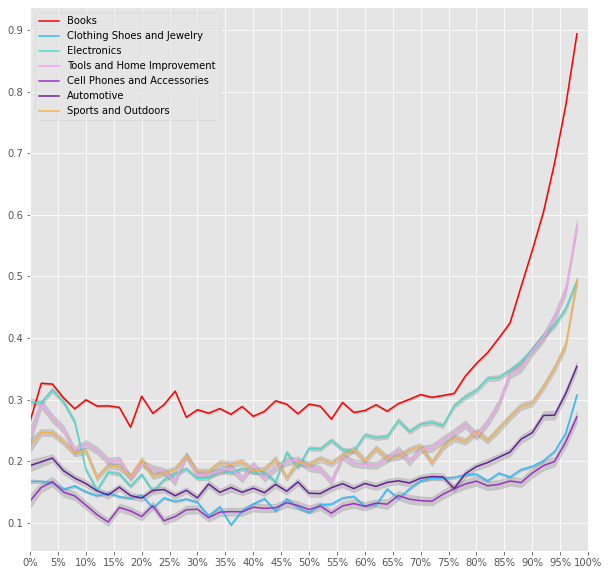

In [6]:
#Figure 2(a)
SummaryFigDrawer(Yvar = "logHelpful",FigData = FigData,ColorList= ColorList,CateList=CateList,SaveFlag=False)

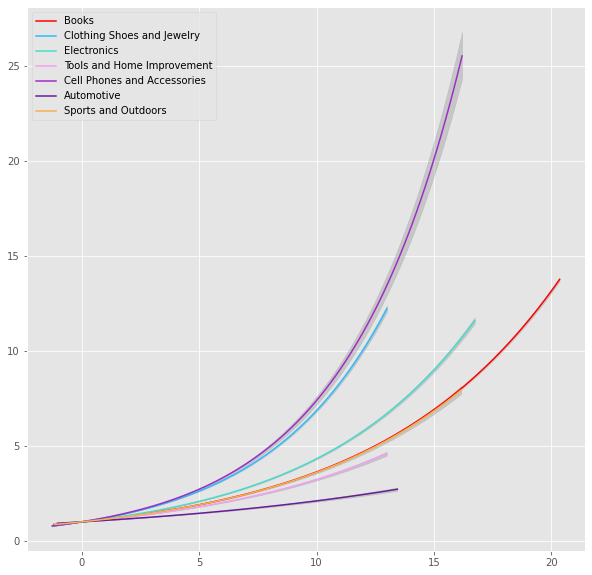

In [7]:
#Figure 2(b)
PredictionDrawer(ColorList= ColorList,CateList=CateList,PreData=PreData,SaveFlag=False)

Saving figure absSScoreAll_InfoEntropy


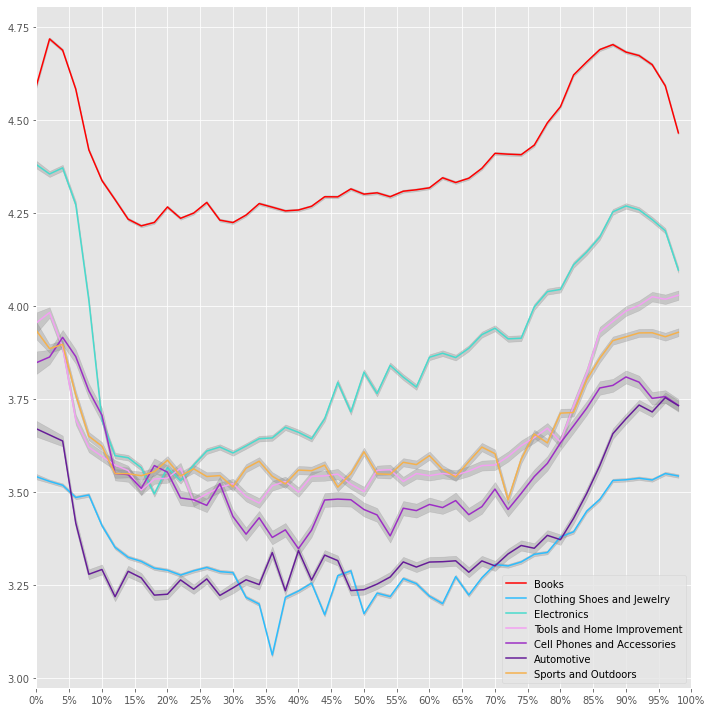

In [8]:
#Figure 3(a)
SummaryFigDrawer(Yvar = "Subjectivity",FigData = FigData,ColorList= ColorList,CateList=CateList,SaveFlag=True)

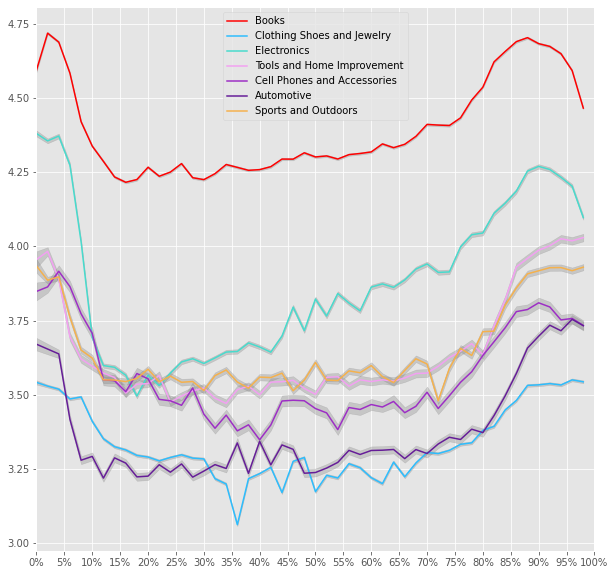

In [10]:
#Figure 3(b)
SummaryFigDrawer(Yvar = "InfoEntropy",FigData = FigData,ColorList= ColorList,CateList=CateList,SaveFlag=False)

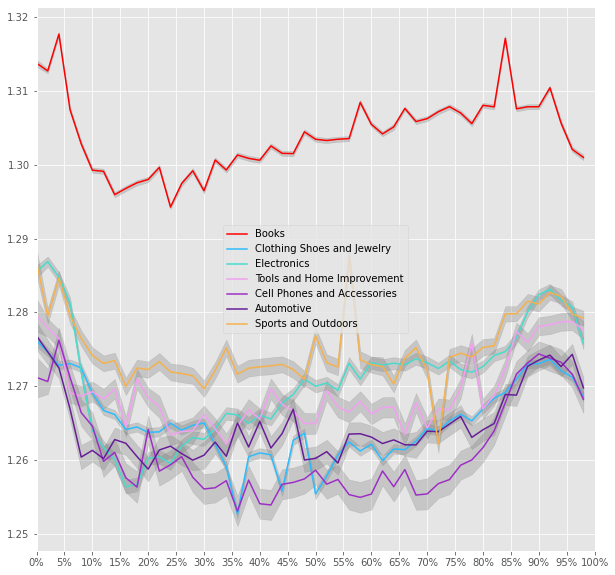

In [11]:
#Figure 3(c)
SummaryFigDrawer(Yvar = "Concise",FigData = FigData,ColorList= ColorList,CateList=CateList,SaveFlag=False)